## Pregunta 4
A continuación se presenta el desarrollo correspondiente a la pregunta 4.

Utilizando el conjunto de datos de la Flor de Iris (que se encuentra integrado dentro de la librería Scikit-learn), elabora un programa en Python que compare los resultados de realizar la clasificación multinomial, a partir de un modelo discriminante (regresión logística) y un modelo generativo (Naive Bayes).

In [67]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Importando las librerías necesarias de Scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [69]:
#Probando inicialmente con el modelo discriminante usando regresión logística.
#Cargando el conjunto de datos de la Flor de Iris
iris = load_iris()
iris_dataframe = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] +  ['target'])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


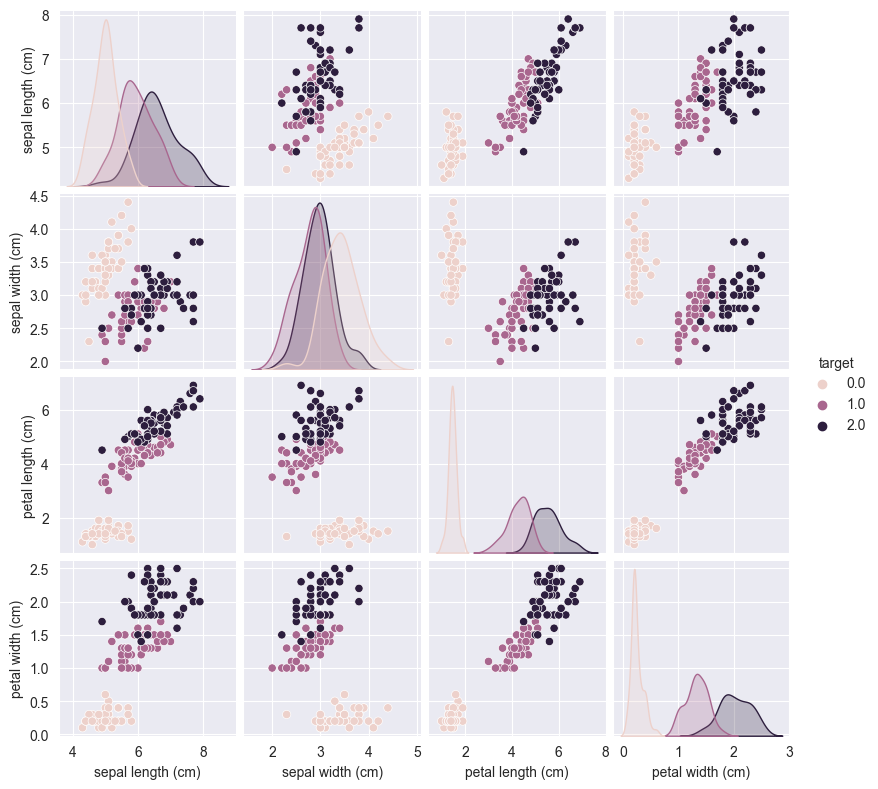

In [70]:
#Graficamos los datos originales
sns.pairplot(iris_dataframe, hue='target', height=2)

In [71]:
#Normalizando y separando los datos en conjunto de entrenamiento y prueba
X = iris.data
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
#Instanciando el modelo discriminante usando regresión logística
logreg = LogisticRegression()

In [73]:
#Entrenando el modelo
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
#Mostrando los coeficientes del modelo
print(logreg.coef_)

[[-0.98826182  1.04667218 -1.80057514 -1.70557033]
 [ 0.46192369 -0.3703357  -0.20059586 -0.74440726]
 [ 0.52633813 -0.67633648  2.001171    2.44997759]]


In [75]:
#Realizando la predicción de los datos de prueba
y_pred = logreg.predict(X_test)

In [76]:
#Mostrando los resultados de la predicción
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [77]:
#Graficando los resultados de la predicción versus los datos de prueba
df_test = pd.DataFrame(X_test, columns=iris.feature_names)
df_test['target'] = y_test
df_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.052506,-0.592373,0.762758,1.580464,2
1,0.189830,-1.973554,0.137547,-0.262387,1
2,-0.416010,2.630382,-1.340227,-1.315444,0
3,1.765012,-0.362176,1.444807,0.790671,2
4,-1.021849,0.788808,-1.283389,-1.315444,0


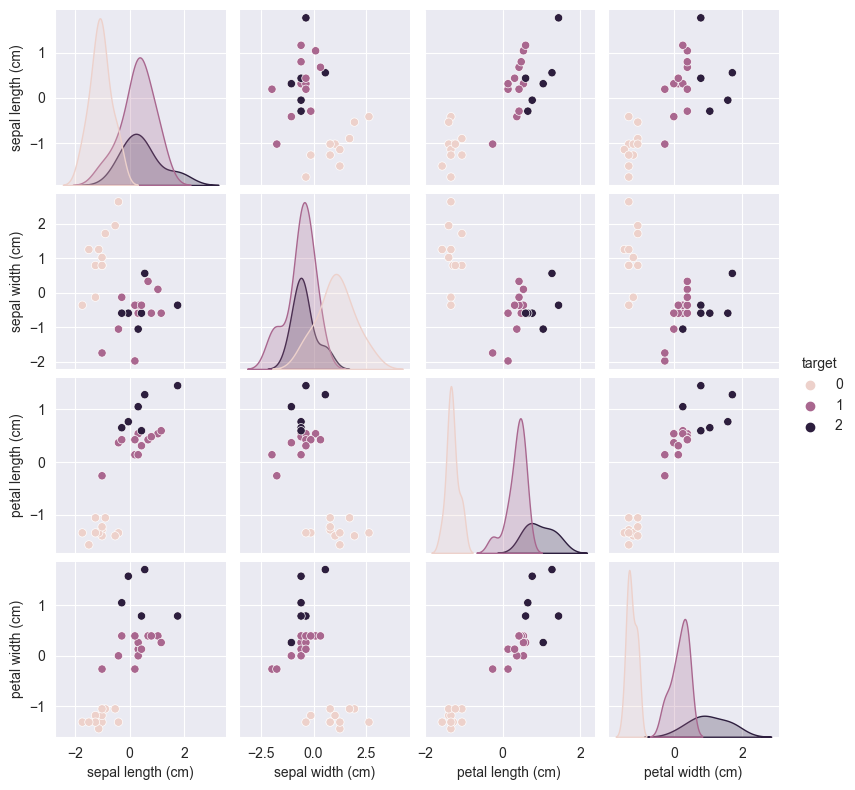

In [78]:
#realizando la gráfica
sns.pairplot(df_test, hue='target', height=2)

In [79]:
#Creando la grafica cn los valores de la predicción
df_pred = pd.DataFrame(X_test, columns=iris.feature_names)
df_pred['target'] = y_pred
df_pred.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.052506,-0.592373,0.762758,1.580464,2
1,0.189830,-1.973554,0.137547,-0.262387,1
2,-0.416010,2.630382,-1.340227,-1.315444,0
3,1.765012,-0.362176,1.444807,0.790671,2
4,-1.021849,0.788808,-1.283389,-1.315444,0


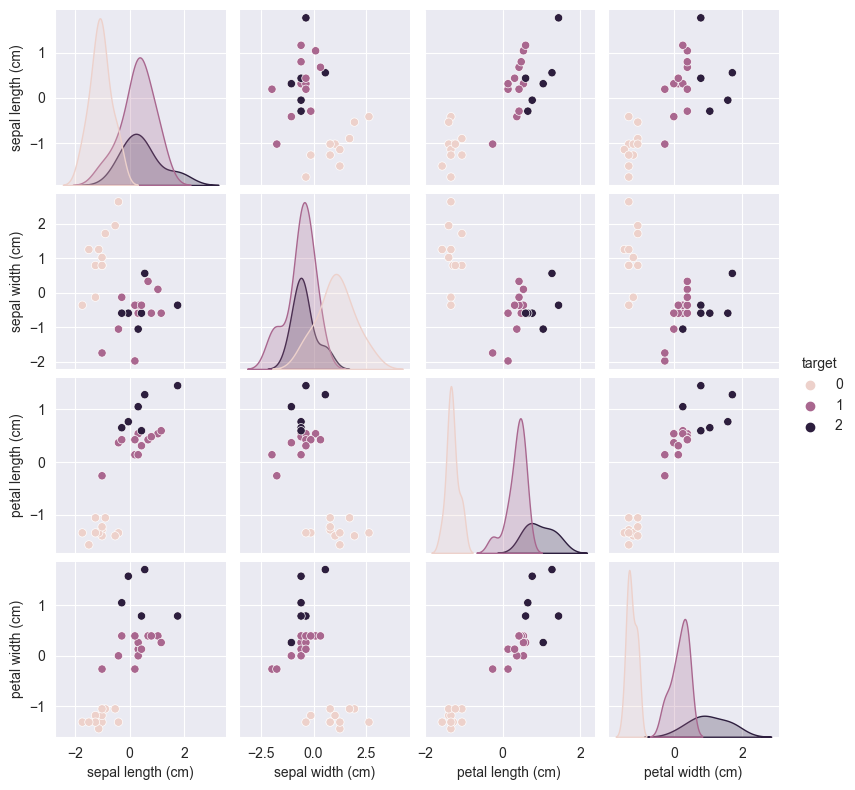

In [80]:
#realizando la gráfica
sns.pairplot(df_pred, hue='target', height=2)

Podemos notar en este caso al usar el modelo discriminante, que al usar la regresión logística, el modelo muestra metricas practicamente perfectas por lo que se puede asumir que este modelo está sobreajustado y puede predecir bien los datos de prueba pero podría tener problemas en un uso general.

## Usando modelo generativo Naive Bayes

In [81]:
#Instanciando el modelo generativo Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [82]:
# Instanciando el modelo
gnb = GaussianNB()

In [83]:
# Entrenando el modelo
gnb.fit(X_train, y_train)

GaussianNB()

In [84]:
# Realizando la predicción de los datos de prueba
y_pred_NB = gnb.predict(X_test)

In [85]:
#Obteniendo los resultados de la predicción
print(metrics.classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [87]:
#Graficando los resultados de la predicción versus los datos de prueba
df_test_NB = pd.DataFrame(X_test, columns=iris.feature_names)
df_test_NB['target'] = y_test
df_test_NB.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.052506,-0.592373,0.762758,1.580464,2
1,0.189830,-1.973554,0.137547,-0.262387,1
2,-0.416010,2.630382,-1.340227,-1.315444,0
3,1.765012,-0.362176,1.444807,0.790671,2
4,-1.021849,0.788808,-1.283389,-1.315444,0


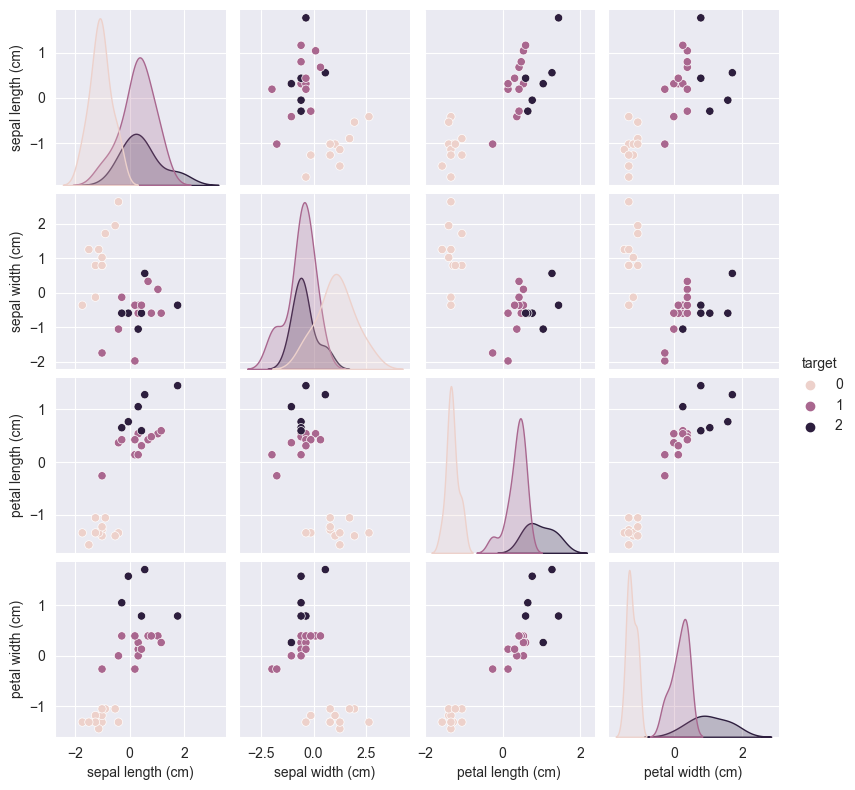

In [88]:
#realizando la gráfica
sns.pairplot(df_test_NB, hue='target', height=2)

In [89]:
#Creando la grafica cn los valores de la predicción
df_pred_NB = pd.DataFrame(X_test, columns=iris.feature_names)
df_pred_NB['target'] = y_pred_NB
df_pred_NB.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.052506,-0.592373,0.762758,1.580464,2
1,0.189830,-1.973554,0.137547,-0.262387,1
2,-0.416010,2.630382,-1.340227,-1.315444,0
3,1.765012,-0.362176,1.444807,0.790671,2
4,-1.021849,0.788808,-1.283389,-1.315444,0


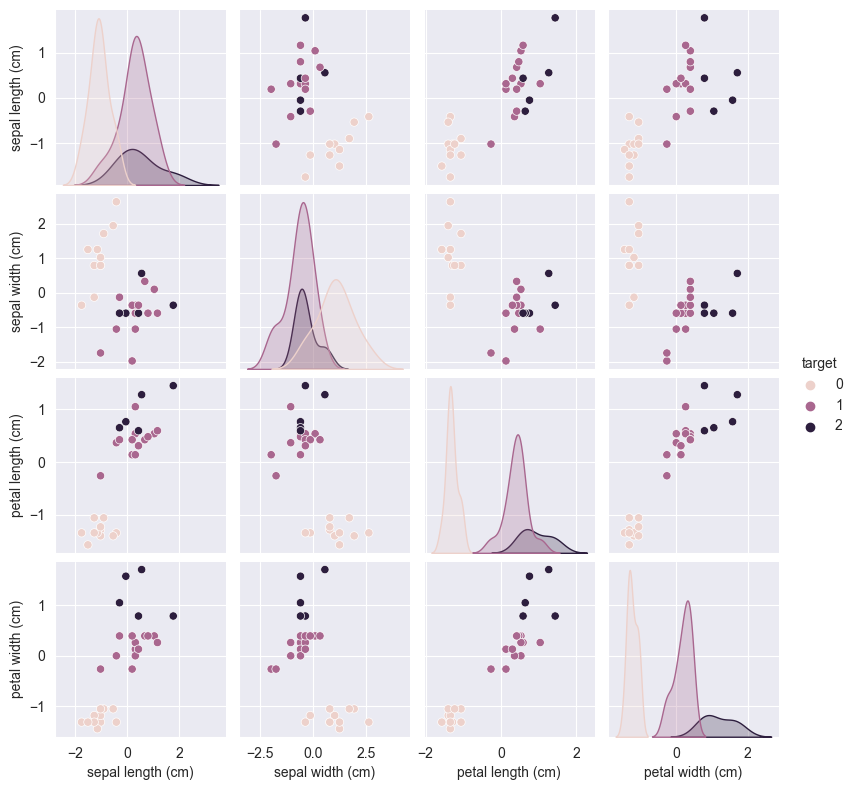

In [90]:
#realizando la gráfica
sns.pairplot(df_pred_NB, hue='target', height=2)

Se puede notar en base a estos resultados que al usar el modelo generativo Naive Bayes, el modelo muestra metricas quizá no tan perfectas como el modelo discriminante, pero es un modelo que puede predecir bien los datos de prueba y con el valor de precición sería el más indicado para usarse en casos generales.